<a href="https://colab.research.google.com/github/kjp07/data-python-learning/blob/main/Wrangle_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging dataframes, creating new columns, replacing with default or correctly formatted values
---

## Merging dataframes

We often want to use data from a set of different data files, or a set of dataframes we have prepared, to combine into one dataframe.

### To merge two dataframes together when both dataframes have column headings in common

If `df1` and `df2` have some column headings in common, to combine the two into one dataframe we use:  

`pd.concat([dataframes to combine])`

This will create a new dataframe with all columns from the original two dataframes, which we can store in a new variable for later use.  Missing values are filled with null values. 

If we want only the column headings that appear in both tables, we can use join='inner':

`pd.concat([dataframes to combine], join='inner')` 

We may also need to refactor the indexing, where two tables are indexed from 0 upwards, adding the two tables together will result in multiple occurences of the same index.  This can be overcome by using ignore_index=True:

`pd.concat([dataframes to combine], join='inner', ignore_index=True)`




### Exercise 1 - look at the data

The Excel file at this URL https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true contains TWO data sheets named county-level and state-level.  

In the code cell below, read the county-level sheet into a dataframe called county_level_df and display the contents to see what it looks like.

Then, add more code to read the state-level sheet into a dataframe called state_level_df and display the contents to see what this one looks like.

In [ ]:
import pandas as pd

In [ ]:
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name="county-level")
county_level_df

,State,County,Population,Age,Income
0,TX,1,72,34,65
1,TX,2,33,42,45
2,TX,5,25,23,46
3,TX,6,54,36,65
4,TX,7,11,42,53
5,TX,8,28,25,62
6,TX,9,82,35,66
7,TX,10,5,40,75
8,MD,11,61,27,22
9,MD,2,5,23,69


In [ ]:
state_level_df = pd.read_excel(url, sheet_name="state-level")
state_level_df

,State,Pop,Age,Income,Education
0,TX,23543,32,54,10.2
1,MD,10343,29,69,10.3
2,IN,5231,41,35,10.1
3,CA,29587,35,67,10.4
4,NY,18142,34,78,10.2


### Exercise 2 - combine the two data sets

Use `pd.concat([list of dataframes])` to combine the two dataframes into a new dataframe called **income_df**, filling missing values with null values.  

**Test output**:  
income_df.shape will be (23, 7)  
The Pop and Education columns will contain NaN for the first 18 rows  
The County and Population columns will contain NaN for the last 5 rows

In [ ]:
income_df = pd.concat([county_level_df, state_level_df])
income_df

,State,County,Population,Age,Income,Pop,Education
0,TX,1.0,72.0,34,65,NaN,NaN
1,TX,2.0,33.0,42,45,NaN,NaN
2,TX,5.0,25.0,23,46,NaN,NaN
3,TX,6.0,54.0,36,65,NaN,NaN
4,TX,7.0,11.0,42,53,NaN,NaN
5,TX,8.0,28.0,25,62,NaN,NaN
6,TX,9.0,82.0,35,66,NaN,NaN
7,TX,10.0,5.0,40,75,NaN,NaN
8,MD,11.0,61.0,27,22,NaN,NaN
9,MD,2.0,5.0,23,69,NaN,NaN


In [ ]:
income_df.shape # Test 1

In [ ]:
income_df[["Pop", "Education"]].isna().sum() # Test 2

Pop          18
Education    18
dtype: int64

In [ ]:
income_df[["County", "Population"]].isna().sum() # Test 3

County        5
Population    5
dtype: int64

### Exercise 3 - ignoring index to get a new indexing system
---

All rows in each dataframe are indexed from 0 to one less than the number of rows.  You will have noticed that the concatenation in the previous exercise has kept the indexing from the individual tables.  

If we are making a new table it may make sense to create a new set of indices, from 0 to one less than the length of the new table.   Do this by adding an extra paramater ignore_index=True.  ignore_index is False by default and all original indices are kept.

Combine the dataframes `county_level_df` and `state_level_df` into a new dataframe called `income_df`, adding the parameter `ignore_index=True`. 

In [ ]:
income_df = pd.concat([county_level_df, state_level_df], ignore_index=True)
income_df

,State,County,Population,Age,Income,Pop,Education
0,TX,1.0,72.0,34,65,NaN,NaN
1,TX,2.0,33.0,42,45,NaN,NaN
2,TX,5.0,25.0,23,46,NaN,NaN
3,TX,6.0,54.0,36,65,NaN,NaN
4,TX,7.0,11.0,42,53,NaN,NaN
5,TX,8.0,28.0,25,62,NaN,NaN
6,TX,9.0,82.0,35,66,NaN,NaN
7,TX,10.0,5.0,40,75,NaN,NaN
8,MD,11.0,61.0,27,22,NaN,NaN
9,MD,2.0,5.0,23,69,NaN,NaN


### Exercise 4 - combine just the columns which are common to both

Add an extra parameter, `join='inner'` and combine the dataframes `county_level_df` and `state_level_df` into a new dataframe called `income_df`  

**Test output**:  
income_df.shape will be (23, 3)   
Column headings will be State, Age, Income  
There will be 23 rows indexed 0 to 22  


In [ ]:
income_df = pd.concat([county_level_df, state_level_df], ignore_index=True, join="inner")
income_df

,State,Age,Income
0,TX,34,65
1,TX,42,45
2,TX,23,46
3,TX,36,65
4,TX,42,53
5,TX,25,62
6,TX,35,66
7,TX,40,75
8,MD,27,22
9,MD,23,69


In [ ]:
income_df.shape # Test 1

(23, 3)

In [ ]:
income_df.columns # Test 2

Index(['State', 'Age', 'Income'], dtype='object')

In [ ]:
income_df.index # Test 3

RangeIndex(start=0, stop=23, step=1)

# Appending rows to a dataframe

Where two dataframes have matching columns, we can append one to the other to add the records from one onto the end of the other.

We do this using dataframe.append()

income_2 = income.append()

### Exercise 5 - add new rows to the end of the income dataframe

The sheet `income` in the Excel data file has 10 further records showing State, Age and Income only, so this table matches the income dataframe exactly.

Read the data from sheet_name `income` in the same Excel data file into a new dataframe called income_new.  

Display the data so that you can inspect it.  

Now append this dataframe to the `income` dataframe to form a new dataframe called **income_df_v2**.  Use the ignore_index=True parameter to reindex.  

**Test output**:  
income_df_v2.shape = (33, 4)  
Rows are indexed from 0 to 32  

In [ ]:
income_new = pd.read_excel(url, sheet_name="income")
income_new

,State,Age,Income,Pop
0,TX,32,69,70
1,MD,41,35,33
2,IN,32,69,23
3,CA,35,54,54
4,NY,29,78,11
5,TX,35,54,27
6,MD,34,67,81
7,IN,41,35,24
8,CA,29,78,10
9,NY,34,67,7


In [ ]:
income_df_v2 = income_df.append(income_new, ignore_index=True)
income_df_v2.shape # Test 1

(33, 4)

In [ ]:
income_df_v2.index # Test 2

RangeIndex(start=0, stop=33, step=1)

In [ ]:
income_df_v2

,State,Age,Income,Pop
0,TX,34,65,NaN
1,TX,42,45,NaN
2,TX,23,46,NaN
3,TX,36,65,NaN
4,TX,42,53,NaN
5,TX,25,62,NaN
6,TX,35,66,NaN
7,TX,40,75,NaN
8,MD,27,22,NaN
9,MD,23,69,NaN


### Exercise 6 - Create a new Pop column in county_level_df

Looking at the tables country_level_df and state_level_df, each has a column containing data on population.  One column is headed *Population* and the other is headed *Pop*.  Ideally these would be merged into one column and this would minimise the number of NaN entries.  

*  Add a new column called '`Pop`' to the `county_level_df` dataframe which contains a copy of all the values in the '`Population`' column  (`df['new_name'] = df['existing_name']`)  
*  Drop the 'Population' column (`df.drop(column name), axis=1`) from `county_level_df` and store the result in a new dataframe called **county_level_df_v2**
*  display the new dataframe

In [ ]:
county_level_df["Pop"] = county_level_df["Population"]
county_level_df_v2 = county_level_df.drop("Population", axis=1)
county_level_df_v2

,State,County,Age,Income,Pop
0,TX,1,34,65,72
1,TX,2,42,45,33
2,TX,5,23,46,25
3,TX,6,36,65,54
4,TX,7,42,53,11
5,TX,8,25,62,28
6,TX,9,35,66,82
7,TX,10,40,75,5
8,MD,11,27,22,61
9,MD,2,23,69,5


## Exercise 7 - clean up the format of the Pop column in state_level_df

Now that both dataframes hava a Pop column, we should make the data consisent in format for both dataframes.

In `county_level_df_v2` the values in the `Pop` column are in 1000s.  In `state_level_df` the values in the `Pop` column are actual numbers.  Let's convert the `state_level_df` values to 1000s for consistency.  We can do this by performing an operation on a column ( `df[column name] = df[column name] / 1000 `) 

*  make a copy of `state_level_df` called **state_level_df_v2** (use df.copy())
*  convert the values in the `Pop` column of the `state_level_df_v2` dataframe to numbers of 1000s from actual numbers, rounding to whole numbers
*  convert the values in the 'Pop' column to int64 (df[column name].astype(int))


**Test output**:
24, 10, 5, 30, 18, dtype: int64






In [ ]:
state_level_df_v2 = state_level_df.copy()
state_level_df_v2["Pop"] = round((state_level_df_v2["Pop"] / 1000)).astype(int)
state_level_df_v2

,State,Pop,Age,Income,Education
0,TX,24,32,54,10.2
1,MD,10,29,69,10.3
2,IN,5,41,35,10.1
3,CA,30,35,67,10.4
4,NY,18,34,78,10.2


In [ ]:
state_level_df_v2["Pop"].dtype

dtype('int64')

### Exercise 8 - combine the two v2 dataframes

Combine `county_level_df_v2` and `state_level_df_v2` to create a new dataframe called **income_df_v3**.  The join type should be 'inner' and ignore_index should be True

In [ ]:
income_df_v3 = pd.concat([county_level_df_v2, state_level_df_v2], join="inner", ignore_index=True)
income_df_v3

,State,Age,Income,Pop
0,TX,34,65,72
1,TX,42,45,33
2,TX,23,46,25
3,TX,36,65,54
4,TX,42,53,11
5,TX,25,62,28
6,TX,35,66,82
7,TX,40,75,5
8,MD,27,22,61
9,MD,23,69,5


###  Exercise 9 - create a function that does all the wrangling

Create a function called **get_income_df()** which reads the three data sheets, creates the new versions of `county_level_df` and `state_level_df` and combines the new versions.

This function should:

*  read the three sheets into the dataframes `county_level_df`, `state_level_df` and `income_new_df`
*  clean up the Population column of `county_level_df` so that it has the name Pop
*  clean up the Pop column of `state_level_df` so that it contains values that are whole numbers of 1000s
*  combine `county_level_df` and `state_level_df` with join='inner', ignoring index
*  append income_new_df to the combined dataframe  
*  SORT the final dataframe on Income in descending order
*  return the final dataframe

**Test output**:  
dataframe shape = (33, 4)   
first row = 10	MD	25	73	98     
last row = 7	TX	40	75	5



In [ ]:
def get_income_df():
  
  # Get dfs
  county_level_df = pd.read_excel(url, sheet_name="county-level")
  state_level_df = pd.read_excel(url, sheet_name="state-level")
  income_new_df = pd.read_excel(url, sheet_name="income")

  # Population to Pop
  county_level_df["Pop"] = county_level_df["Population"]

  # Pop to wn of 1000s
  state_level_df["Pop"] = round(state_level_df["Pop"]/1000).astype(int)

  # Combine
  income_df = pd.concat([county_level_df, state_level_df], join="inner", ignore_index=True)

  # Append 
  income_df = income_df.append(income_new_df, ignore_index=True)

  # Sort
  income_df.sort_values(by=["Income"], ascending=False, inplace=True)

  return income_df

get_income_df()

,State,Age,Income,Pop
15,MD,22,81,89
31,CA,29,78,10
27,NY,29,78,11
22,NY,34,78,18
14,MD,31,78,34
7,TX,40,75,5
11,MD,29,75,64
16,MD,25,73,21
10,MD,25,73,98
25,IN,32,69,23


### Exercise 10 - group by state and calculate statistics

Run the function get_income_df() and store the result in a new dataframe called **income_df**.

Group income_df by State and calculate some statistics on the groups.

Add a description, in the cell below, of what the statistics show and why in the text box.

In [ ]:
income_df = get_income_df()
income_df.columns

Index(['State', 'Age', 'Income', 'Pop'], dtype='object')

In [ ]:
income_df.groupby("State").count()

,Age,Income,Pop
State,,,
CA,3,3,3
IN,3,3,3
MD,13,13,13
NY,3,3,3
TX,11,11,11


**Note**  
Marlyand (MD) and Texas (TX) have the highest number of records (n=13, n=11). California (CA), Indianna (IN), and New York (NY) have the lowest number of records (all n=3). This is important to note as any comparison between the states using the current data may not accurately or precisely reflect the real world data.

In [ ]:
income_df.groupby("State").agg({
    "Income": ["min", "mean", "median", "max", "std"],
})

Income                                 
         min       mean median max        std
State                                        
CA        54  66.333333     67  78  12.013881
IN        35  46.333333     35  69  19.629909
MD        22  64.230769     69  81  16.931991
NY        67  74.333333     78  78   6.350853
TX        45  59.454545     62  75   9.668129

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f74718e50>,
      dtype=object)

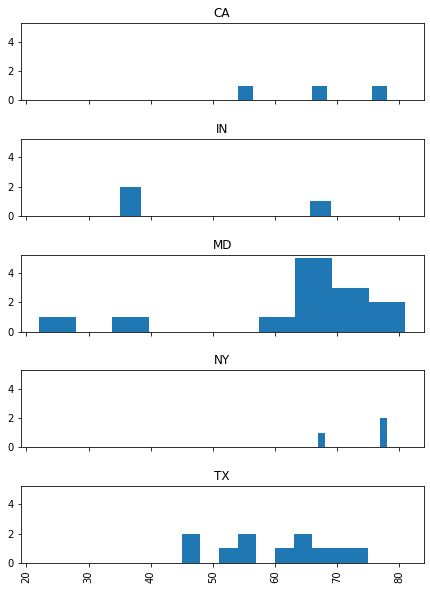

In [ ]:
income_df.hist(by="State", column="Income", bins=10, sharex=True, sharey=True, figsize=(7, 10), layout=(5, 1))

**Income analysis**  
- Maryland (MD) has both the lowest income (22) and the highest income (81) of the five states. Maryland also has the largest spread of income with a standard deviation of 16.9.
- New York (NY) has the smallest spread of income with a standard deviation of 6.3 (min=67, max=78).
- NY's minimum income is greater than the minimum income of the other states.
- The median income of Indianna (ID) is equal its minimum income (median=35, min=35). This suggests that the higher incomes are outliers, with most Indianna incomes being at the lower end.
- The median income of NY's is equal to its max income (median=78, max=78). This suggests the income of NY is distributed mostly around it's maximum income. 


